## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Preprocessing the dataset

In [5]:
# check for null values

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# filling the missing vlaues with the mean values of the particular column
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

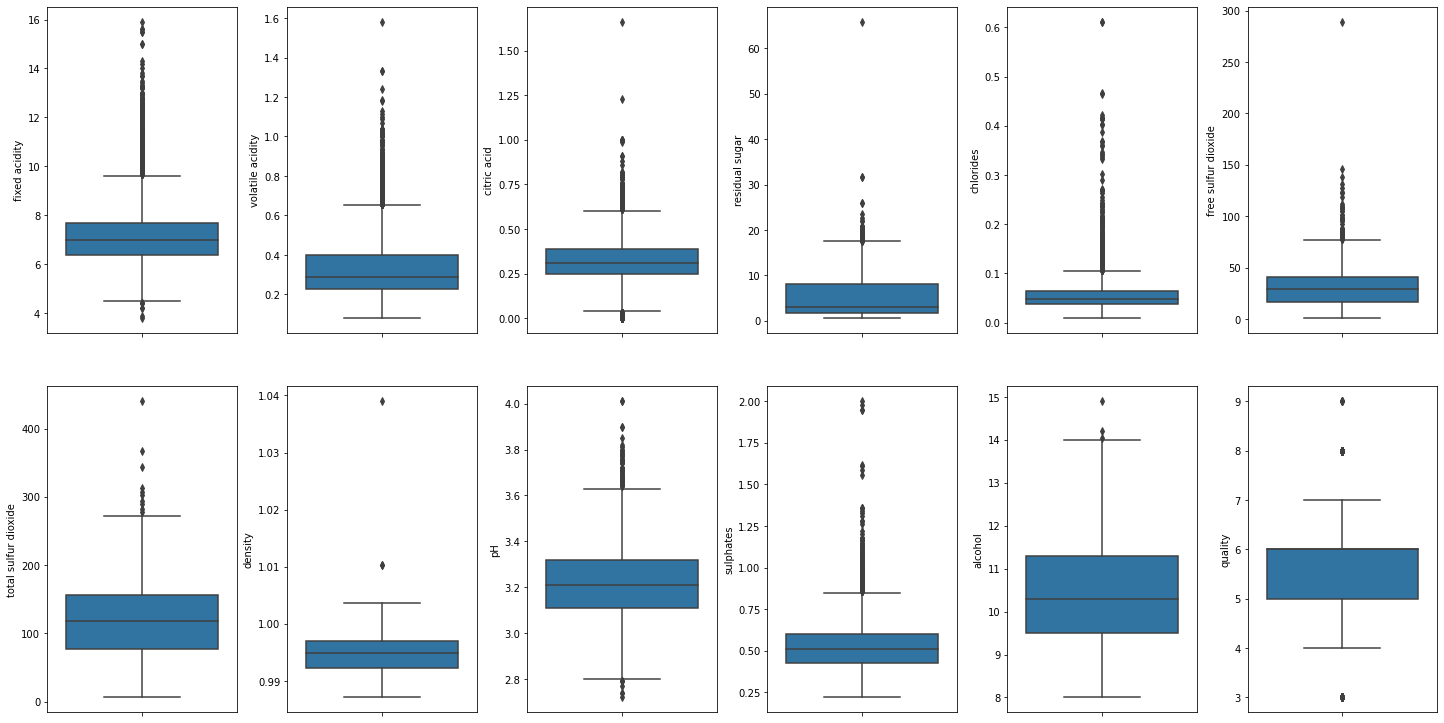

In [9]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Removing outliers from dataset

In [10]:
def outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    upper = (q3 + 1.5 * iqr)
    lower = (q3 - 1.5 * iqr)
    
    ls = df.index[(df[col] <= lower) | (df[col] >= upper)]
    return ls

In [11]:
index = []
columns = ['residual sugar', 'free sulfur dioxide', 'density', 'citric acid',]
for col in columns:
    if col != 'type':
        index.extend(outliers(df,col))
index = np.unique(index)
df.drop(index, inplace=True)

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000
mean,7.248654,0.302187,0.340601,5.769798,0.053292,32.209667,125.802523,0.994709,3.203610,0.527887,10.412797,5.858809
std,1.211677,0.130632,0.091404,4.525828,0.030914,15.655721,50.935796,0.002680,0.150945,0.147640,1.076240,0.845078
min,4.200000,0.080000,0.190000,0.600000,0.012000,6.000000,9.000000,0.990020,2.720000,0.220000,8.000000,3.000000
25%,6.500000,0.220000,0.270000,1.900000,0.038000,20.000000,95.000000,0.992400,3.100000,0.430000,9.500000,5.000000
50%,7.000000,0.270000,0.320000,4.400000,0.046000,31.000000,127.000000,0.994710,3.190000,0.500000,10.300000,6.000000
75%,7.700000,0.350000,0.400000,8.700000,0.057000,43.000000,161.000000,0.996800,3.300000,0.590000,11.200000,6.000000
max,15.600000,1.240000,0.600000,17.500000,0.422000,76.000000,366.500000,1.003690,3.820000,1.980000,14.000000,9.000000


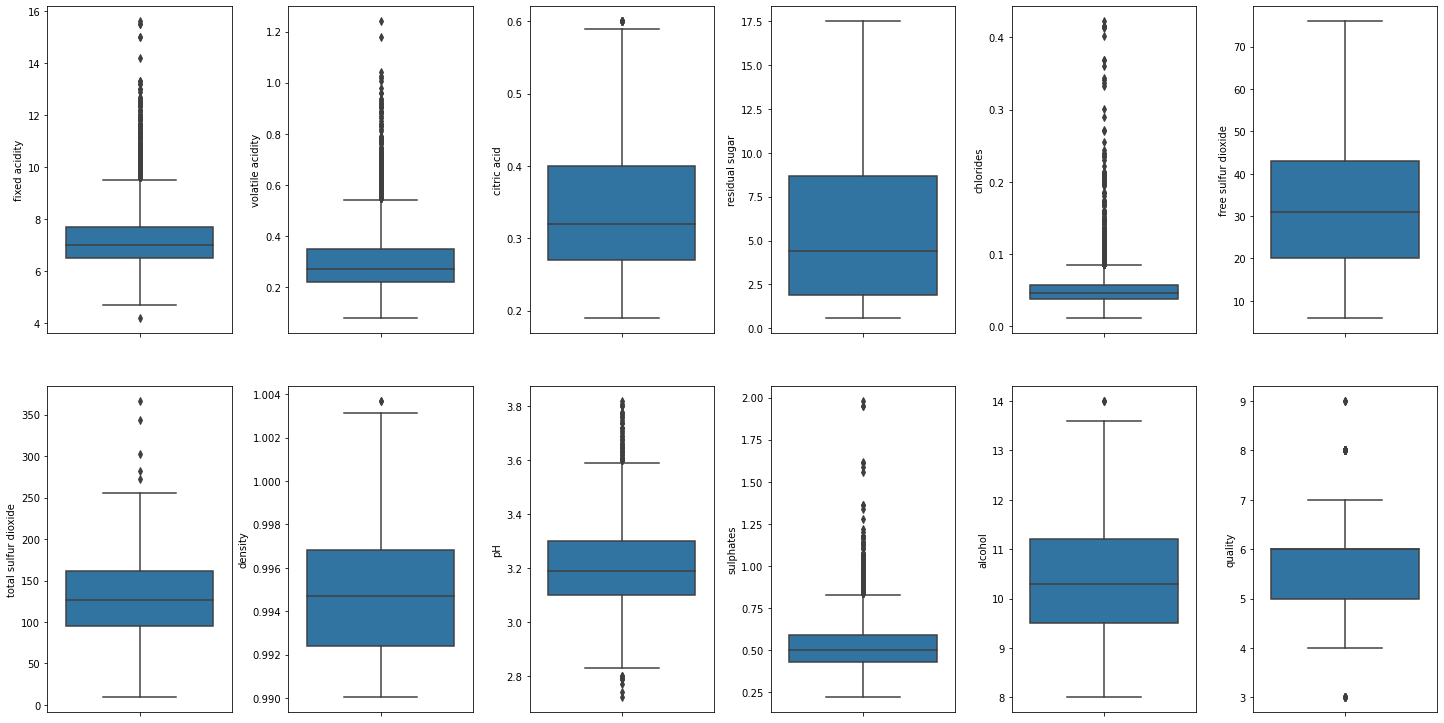

In [13]:
# boxplot after removing outlier
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

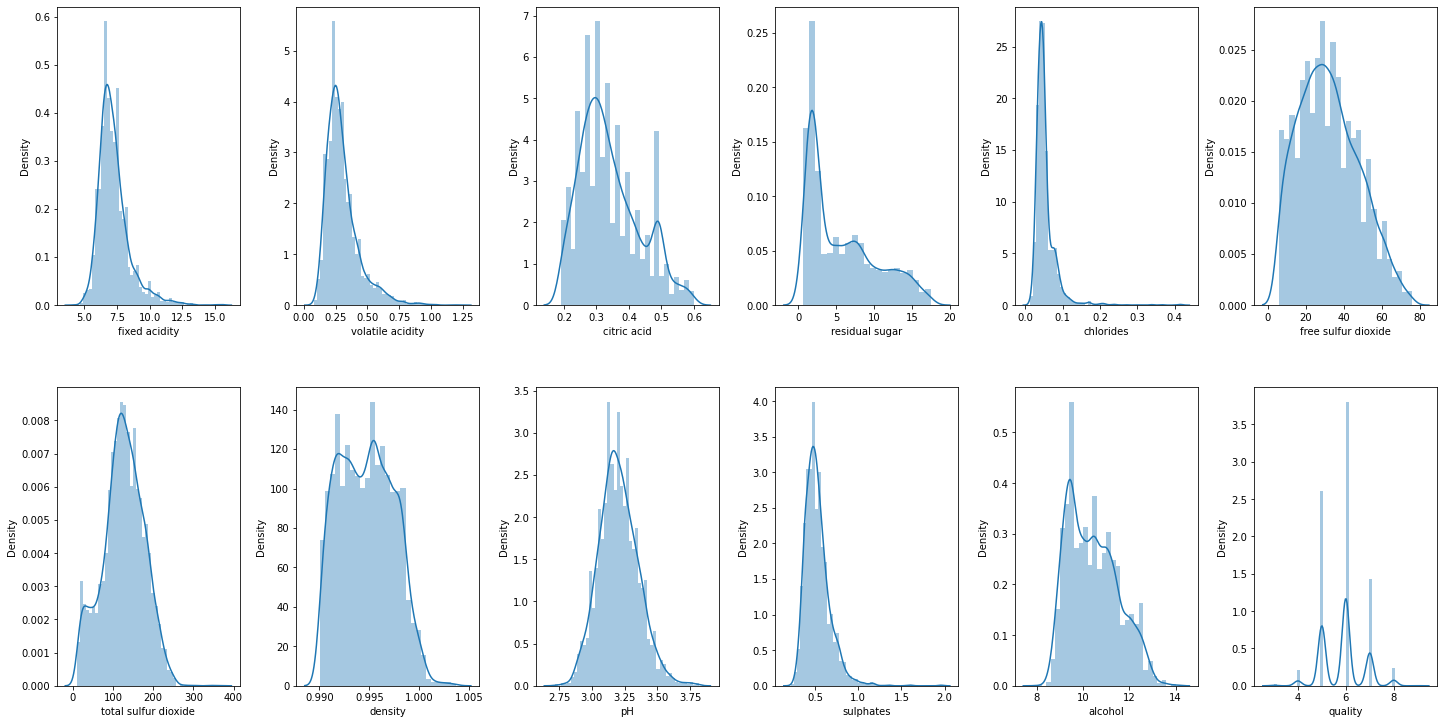

In [14]:
# creating dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [15]:
# log transformation
df['free sulfur dioxide'] = np.log(1+df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

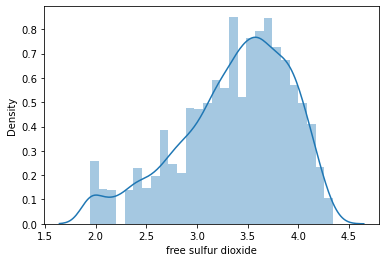

In [16]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='type', ylabel='count'>

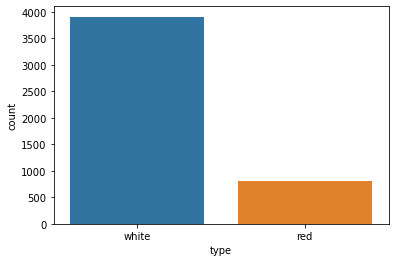

In [17]:
sns.countplot(df['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

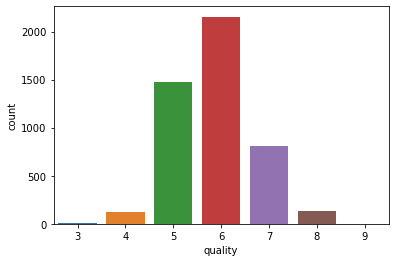

In [18]:
sns.countplot(df['quality'])

## Correlation Matrix

<AxesSubplot:>

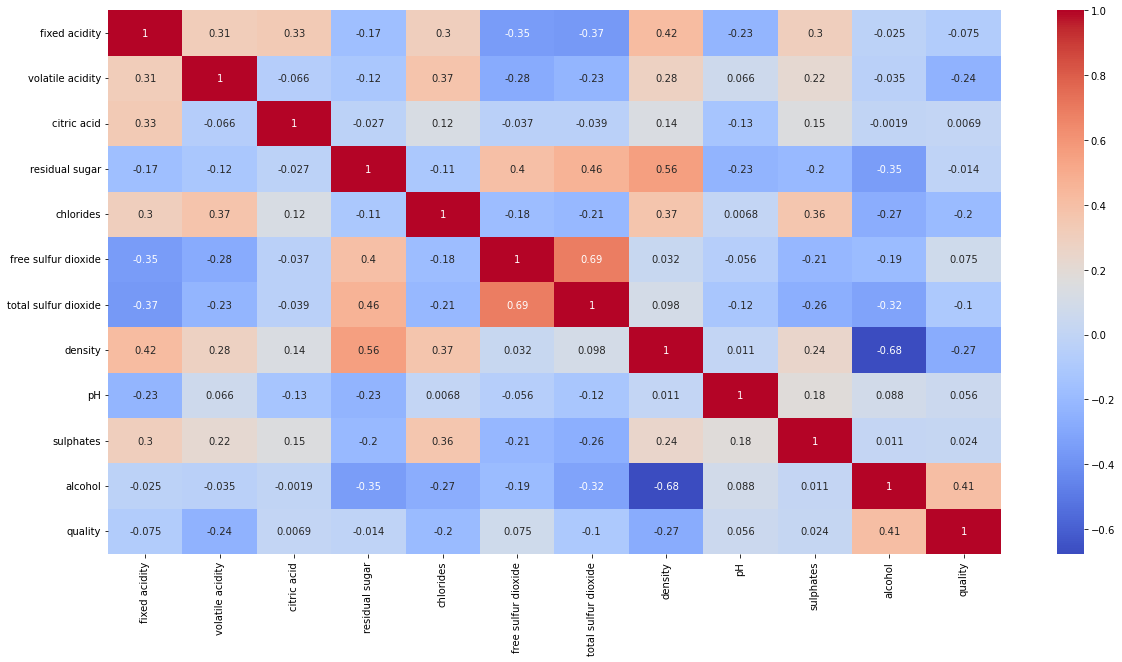

In [19]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input split

In [20]:
x = df.drop(columns=['type', 'quality'])
y = df['quality']

## Class Imbalancement

In [21]:
y.value_counts()

6    2154
5    1480
7     810
8     137
4     120
3      13
9       3
Name: quality, dtype: int64

In [22]:
oversample = SMOTE(k_neighbors=2)
# transform the dataset
x, y = oversample.fit_resample(x,y)

In [23]:
y.value_counts()

6    2154
5    2154
7    2154
8    2154
4    2154
3    2154
9    2154
Name: quality, dtype: int64

## Model Training

In [24]:
# classify function
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test)*100)
    
    # cross-validation
    score = cross_val_score(model, x, y, cv=5)
    print("CV Score:", np.mean(score)*100)

## Using different models to test accuracy

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy: 35.57692307692308
CV Score: 35.760602381549376


In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy: 83.98541114058355
CV Score: 79.20171248091988


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy: 90.11936339522546
CV Score: 85.02464028223164


Remarks :-
Earlier I got an accuracy of about 88% from random forest classifier. But after removing outliers from the dataset from certain specific columns which had many outliers I was able to achive an accuracy of about 90%.
Random Forest classifier turned out to the best model in this case.